In [8]:
#importing libraries

import pandas as pd # data preprocessing, CSV File i/o
import numpy as np # implement linear algebra

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

In [9]:
import os
try:
    device_name = os.environ['COLAB_TPU_ADDR']
    TPU_ADDRESS = 'grpc://' + device_name
    print('Found TPU at: {}'.format(TPU_ADDRESS))
except KeyError:
    print('TPU not found')

TPU not found


In [10]:
train_data_gen = ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                    zoom_range=0.2, horizontal_flip=True)

test_data_gen = ImageDataGenerator(rescale=1./255)

In [11]:
training_set = train_data_gen.flow_from_directory('/content/drive/MyDrive/archive/test',
                                                  target_size=(48,48),
                                                  batch_size=32,
                                                  color_mode='grayscale',
                                                  class_mode='categorical')

Found 7188 images belonging to 7 classes.


In [12]:
test_set = test_data_gen.flow_from_directory(('/content/drive/MyDrive/archive/train'),
                                            target_size=(48,48),
                                            batch_size=32,
                                            color_mode='grayscale',
                                            class_mode='categorical')


Found 3349 images belonging to 7 classes.


In [13]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
    
    model.add(MaxPool2D(pool_size=2,strides=2))
    
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=2,strides=2))
    
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=2,strides=2))
    
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=2,strides=2))
    
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
    model.add(MaxPool2D(pool_size=2,strides=2))
    
    model.add(Flatten())
    
    model.add(Dense(units=128,activation='relu',kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(units= 64,activation='relu',kernel_initializer='he_normal'))
    model.add(Dropout(0.25))
    model.add(Dense(units= 32,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(units=7,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

In [17]:
model = build_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 64)         

In [18]:
hist = model.fit(x=training_set,validation_data=test_set,epochs=60,batch_size=64)

Epoch 1/60
225/225 [==============================] - 2491s 11s/step - loss: 1.8450 - accuracy: 0.2340 - val_loss: 2.4731 - val_accuracy: 0.0000e+00
Epoch 2/60
225/225 [==============================] - 66s 294ms/step - loss: 1.8182 - accuracy: 0.2460 - val_loss: 2.3215 - val_accuracy: 0.0000e+00
Epoch 3/60
225/225 [==============================] - 66s 293ms/step - loss: 1.8120 - accuracy: 0.2455 - val_loss: 2.2297 - val_accuracy: 0.0000e+00
Epoch 4/60
225/225 [==============================] - 71s 316ms/step - loss: 1.8058 - accuracy: 0.2453 - val_loss: 2.3752 - val_accuracy: 0.0000e+00
Epoch 5/60
225/225 [==============================] - 78s 345ms/step - loss: 1.7958 - accuracy: 0.2472 - val_loss: 2.1768 - val_accuracy: 0.0000e+00
Epoch 6/60
225/225 [==============================] - 85s 377ms/step - loss: 1.7880 - accuracy: 0.2490 - val_loss: 2.1196 - val_accuracy: 0.3491
Epoch 7/60
225/225 [==============================] - 82s 366ms/step - loss: 1.7832 - accuracy: 0.2568 - val_l

In [19]:
 model.save('model_2.h5')


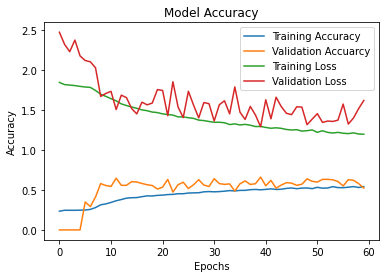

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Validation Accuarcy', 'Training Loss', 'Validation Loss'])

plt.show()

In [21]:
Emotion_Dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

(48, 48)
(1, 48, 48)
0
Angry


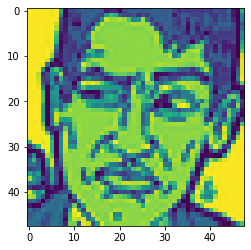

In [26]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/archive/test/angry/im0.png",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("./model_2.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(Emotion_Dict[img_index])
plt.show()

* Hence, it's working properly

(48, 48)
(1, 48, 48)
6
Surprise


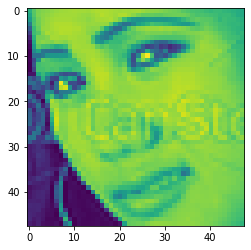

In [27]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/archive/test/disgusted/im0.png",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("./model_2.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(Emotion_Dict[img_index])
plt.show()

* Here, the model predicted wrong! Personally, I'm also confused :')

(48, 48)
(1, 48, 48)
0
Angry


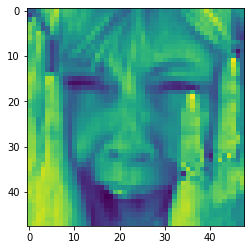

In [28]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/archive/test/fearful/im0.png",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("./model_2.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(Emotion_Dict[img_index])
plt.show()

* Hence, it has predicted wrong again!

(48, 48)
(1, 48, 48)
3
Happy


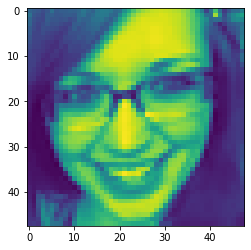

In [29]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/archive/test/happy/im0.png",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("./model_2.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(Emotion_Dict[img_index])
plt.show()

* Predicted correct! :)

(48, 48)
(1, 48, 48)
0
Angry


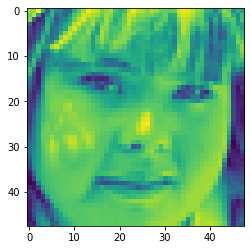

In [30]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/archive/test/neutral/im0.png",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("./model_2.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(Emotion_Dict[img_index])
plt.show()

* It's predicted wrong!

(48, 48)
(1, 48, 48)
0
Angry


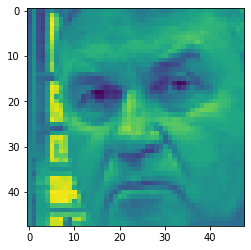

In [31]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/archive/test/sad/im0.png",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("./model_2.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(Emotion_Dict[img_index])
plt.show()

* Again a wrong prediction!

(48, 48)
(1, 48, 48)
6
Surprise


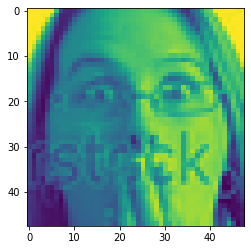

In [32]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/archive/test/surprised/im0.png",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("./model_2.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(Emotion_Dict[img_index])
plt.show()

* Predicted right!